# Load data and python libraries

In [1]:
%matplotlib inline 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

# supporting math libraries
import math
import numpy as np

In [2]:
input_folder = './data/'
output_folder = './output'

input_file = 'athlete_events.csv'

In [3]:
df_data = pd.read_csv(input_folder + input_file)
print("Dataset size: ", len(df_data))

Dataset size:  271116


# Dataset First Look

**The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:**

- **ID** - Unique number for each athlete
- **Name** - Athlete's name
- **Sex** - M or F
- **Age** - Integer
- **Height** - In centimeters
- **Weight** - In kilograms
- **Team** - Team name
- **NOC** - National Olympic Committee 3-letter code
- **Games** - Year and season
- **Year** - Integer
- **Season** - Summer or Winter
- **City** - Host city
- **Sport** - Sport
- **Event** - Event
- **Medal** - Gold, Silver, Bronze, or NA

In [4]:
# a quick look at the data
k = int(len(df_data)/5)
print("Table shape: ", df_data.shape)
print("View of every ", k, "observation:")
df_data.iloc[::k].T

Table shape:  (271116, 15)
View of every  54223 observation:


,0,54223,108446,162669,216892,271115
ID,1,27817,54826,81686,108914,135571
Name,A Dijiang,Lopold Desmet,Rei Jimbo,"William ""Willi"" Moore",Veronica Servente Tealdy,Tomasz Ireneusz ya
Sex,M,M,F,M,F,M
Age,24,25,26,25,15,34
Height,180,164,164,182,NaN,185
Weight,80,70,55,67,NaN,96
Team,China,Belgium,Japan,Great Britain,Italy,Poland
NOC,CHN,BEL,JPN,GBR,ITA,POL
Games,1992 Summer,1960 Summer,2000 Summer,1972 Summer,1992 Summer,2002 Winter
Year,1992,1960,2000,1972,1992,2002


In [5]:
# add new features
df_data['outcome'] = df_data['Medal'].isnull().apply(lambda x: "won a medal" if x == False else "NO medal")

In [6]:
# assumption: NaN="No medal" in the column "Medal"
df_data['Medal'] = df_data['Medal'].fillna('No medal')

In [7]:
# ID check
df_data.groupby('ID')['Name'].nunique().describe()

count    135571.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Name, dtype: float64

In [8]:
# delete unnecessary features
print("Delete ID column since each ID corresponds to unique Name")
df_data = df_data.drop('ID', axis=1)

Delete ID column since each ID corresponds to unique Name


In [9]:
print('there are ', len(df_data) - len(df_data.drop_duplicates()),' duplicated observations in the dataset.')

print("Delete duplicates:")
print(len(df_data))
df_data = df_data.drop_duplicates()
print(len(df_data))

there are  1385  duplicated observations in the dataset.
Delete duplicates:
271116
269731


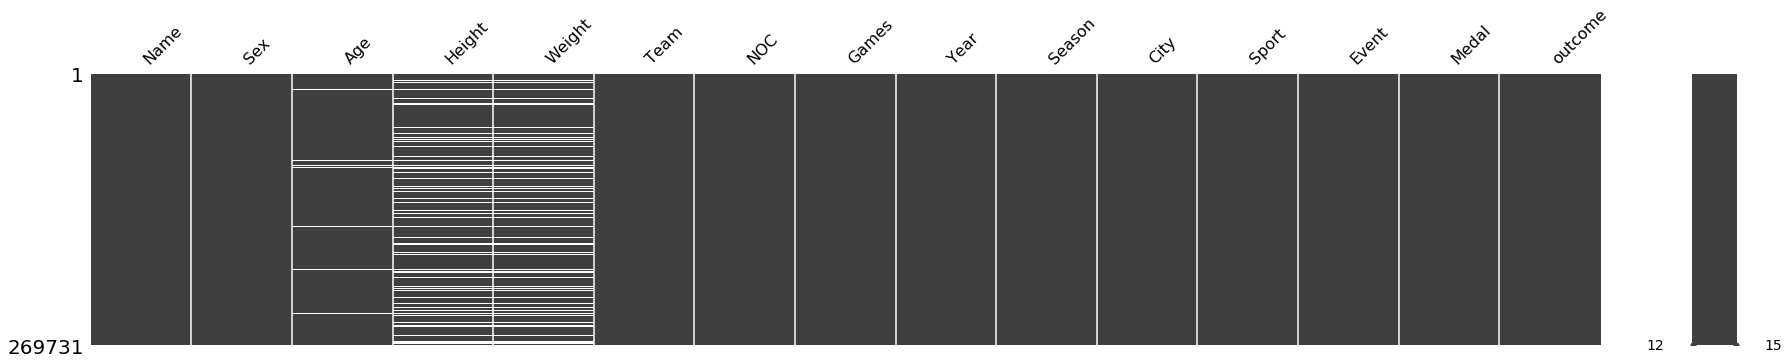

In [10]:
# How many missing values are there in our dataset?
missingno.matrix(df_data, figsize = (30,5))

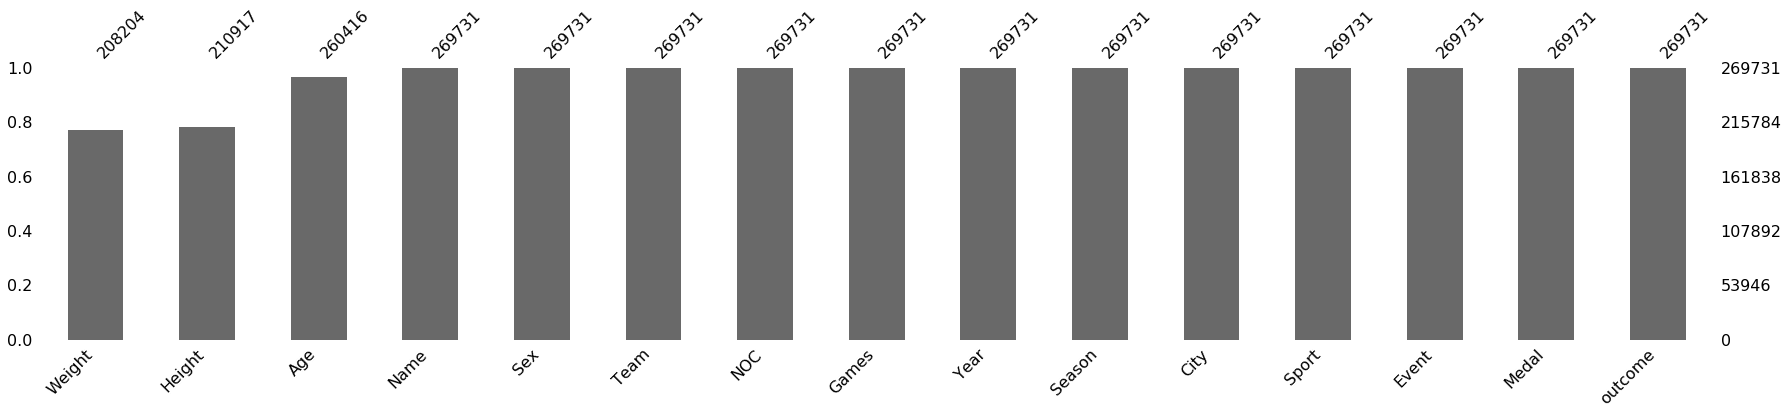

In [11]:
# number of missing values by columns
missingno.bar(df_data, sort='ascending', figsize = (30,5))

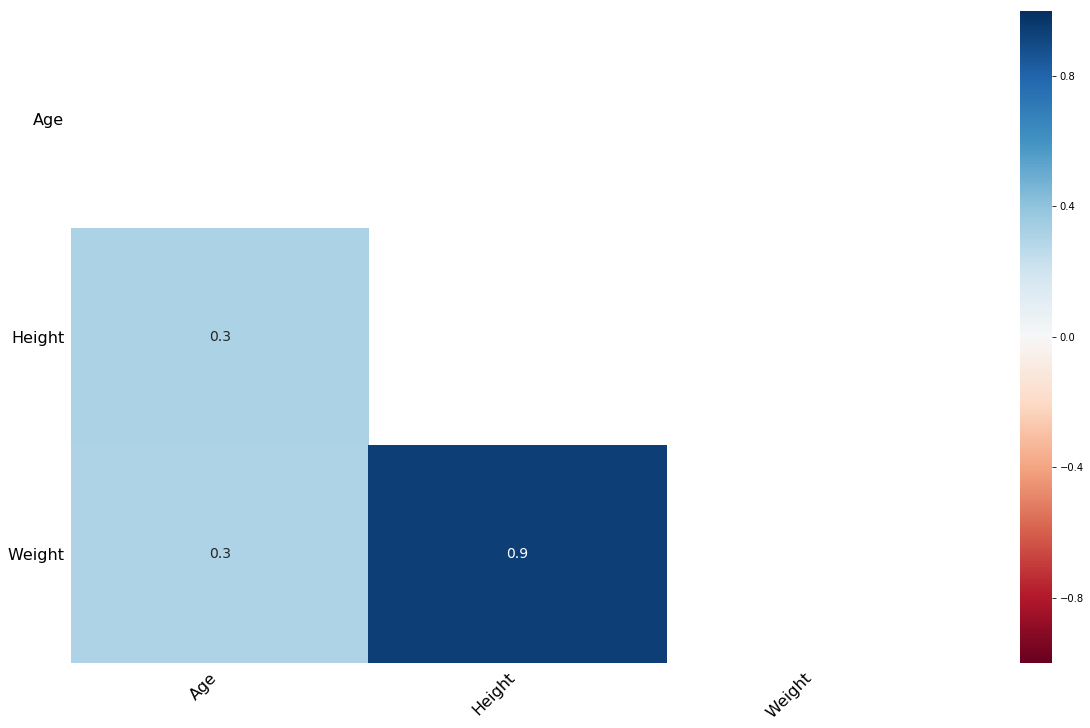

In [12]:
# How strongly the presence or absence of one variable affects the presence of another:
# -1 (if one variable appears the other definitely does not) 
# 0 (variables appearing or not appearing have no effect on one another) 
# 1 (if one variable appears the other definitely also does).


missingno.heatmap(df_data)

##### Observations:

- dataset has very few columns with missing values: Age, Height, Weight and Medal
- there are  1385  duplicated observations in the dataset (were deleted)
- in 30% of missing cases for Age, Weight and Height are missing
- 90% of observations that have Weight missing also have Height missing (and vise versa)

# Data Exploration - Univariate

In [13]:
def plot_distribution(df, list_col_names, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(len(list_col_names) / cols)
    
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    
    for i, column in enumerate(list_col_names):
        df_plot = df[df[column].isnull() == False].copy()
        
        ax = fig.add_subplot(rows, cols, i + 1)
        
        if df_plot.dtypes[column] == np.object:
            value_counts = df_plot[column].value_counts()
             
            if len(value_counts) < 11:
                g = sns.countplot(y=column, data=df_plot, palette='Set2')
                substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
                g.set(yticklabels=substrings)
                plt.xticks(rotation=25)
            else:
                value_counts = value_counts.iloc[:5].sort_values(ascending=True)
                value_counts.plot.barh(ax=ax, alpha=0.5, color='c', legend=False) 
                ax.set_xlabel('Count')
            ax.set_title(column)
        else:
            g = sns.distplot(df_plot[column])
            plt.title('Number of missing values: ' + str(len(df) - len(df_plot)))
            plt.xticks(rotation=25)
    

In [14]:
print("Data types:")

(df_data.dtypes).value_counts()

Data types:


object     11
float64     3
int64       1
dtype: int64

In [15]:
# grouping features by data types
columns_numerical = list(df_data.select_dtypes('float')) + list(df_data.select_dtypes('int'))
columns_categorical = list(df_data.select_dtypes('object')) 

print("\n\nnumerical columns (", len(columns_numerical), "): \n", columns_numerical)
print("\n\ncategorical columns (", len(columns_categorical), "): \n", columns_categorical)



numerical columns ( 4 ): 
 ['Age', 'Height', 'Weight', 'Year']


categorical columns ( 11 ): 
 ['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal', 'outcome']


### Data distributions

In [16]:
# describing all the Numerical Features
df_data[columns_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,260416.0,25.454776,6.163869,10.0,21.0,24.0,28.0,97.0
Height,210917.0,175.338953,10.518507,127.0,168.0,175.0,183.0,226.0
Weight,208204.0,70.701778,14.349027,25.0,60.0,70.0,79.0,214.0
Year,269731.0,1978.623073,29.752055,1896.0,1960.0,1988.0,2002.0,2016.0


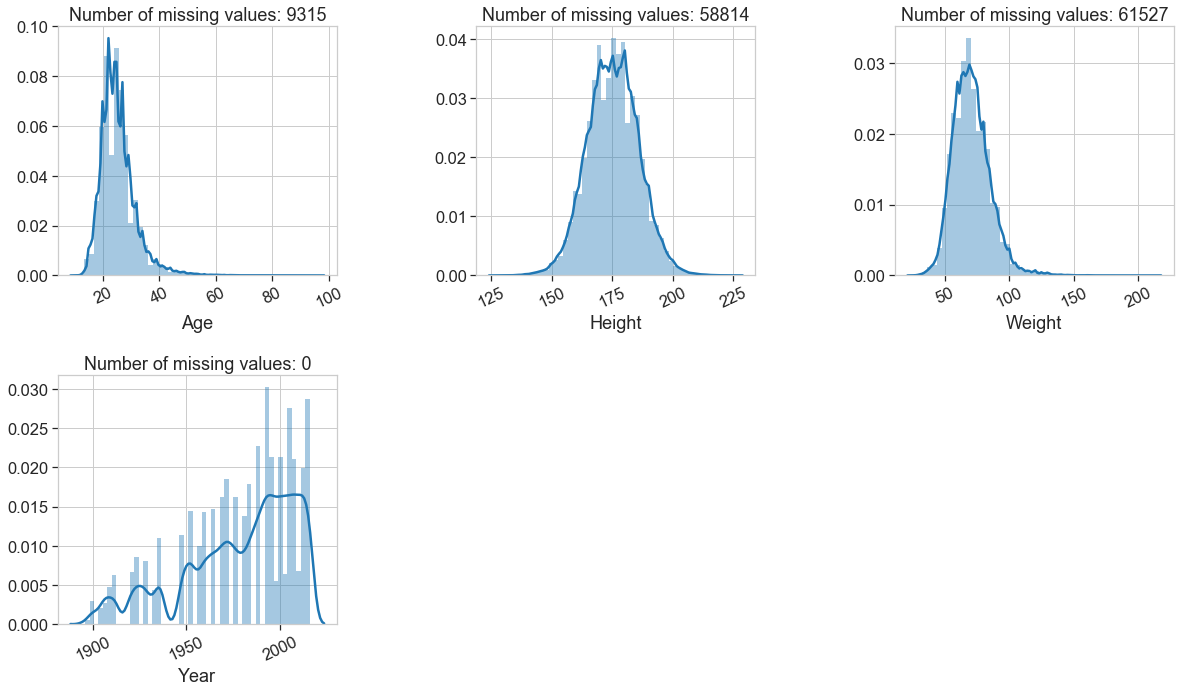

In [17]:
# Let’s plot the distribution of each numerical feature
plot_distribution(df_data, columns_numerical, cols=3, width=20, height=11, hspace=0.4, wspace=0.5)

In [18]:
print ('Number of unique values in the column "Year"')
df_tmp = df_data[['Year']].copy()
df_tmp = df_tmp.sort_values(by='Year')
df_tmp = df_tmp.drop_duplicates()
df_tmp = df_tmp.reset_index()
len(df_tmp)

Number of unique values in the column "Year"


35

In [19]:
print('Distribution of year intervals between competitions:')
df_tmp['years between competitions'] = df_tmp['Year'] - df_tmp['Year'].shift(1)
df_tmp['years between competitions'].describe()

Distribution of year intervals between competitions:


count    34.000000
mean      3.529412
std       1.973081
min       2.000000
25%       2.000000
50%       4.000000
75%       4.000000
max      12.000000
Name: years between competitions, dtype: float64

In [20]:
# describing all the Categorical Features
df_data[columns_categorical].describe()

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,outcome
count,269731,269731,269731,269731,269731,269731,269731,269731,269731,269731,269731
unique,134732,2,1184,230,51,2,42,66,765,4,2
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,No medal,NO medal
freq,39,195353,17598,18604,13821,221167,22297,38624,5733,229959,229959


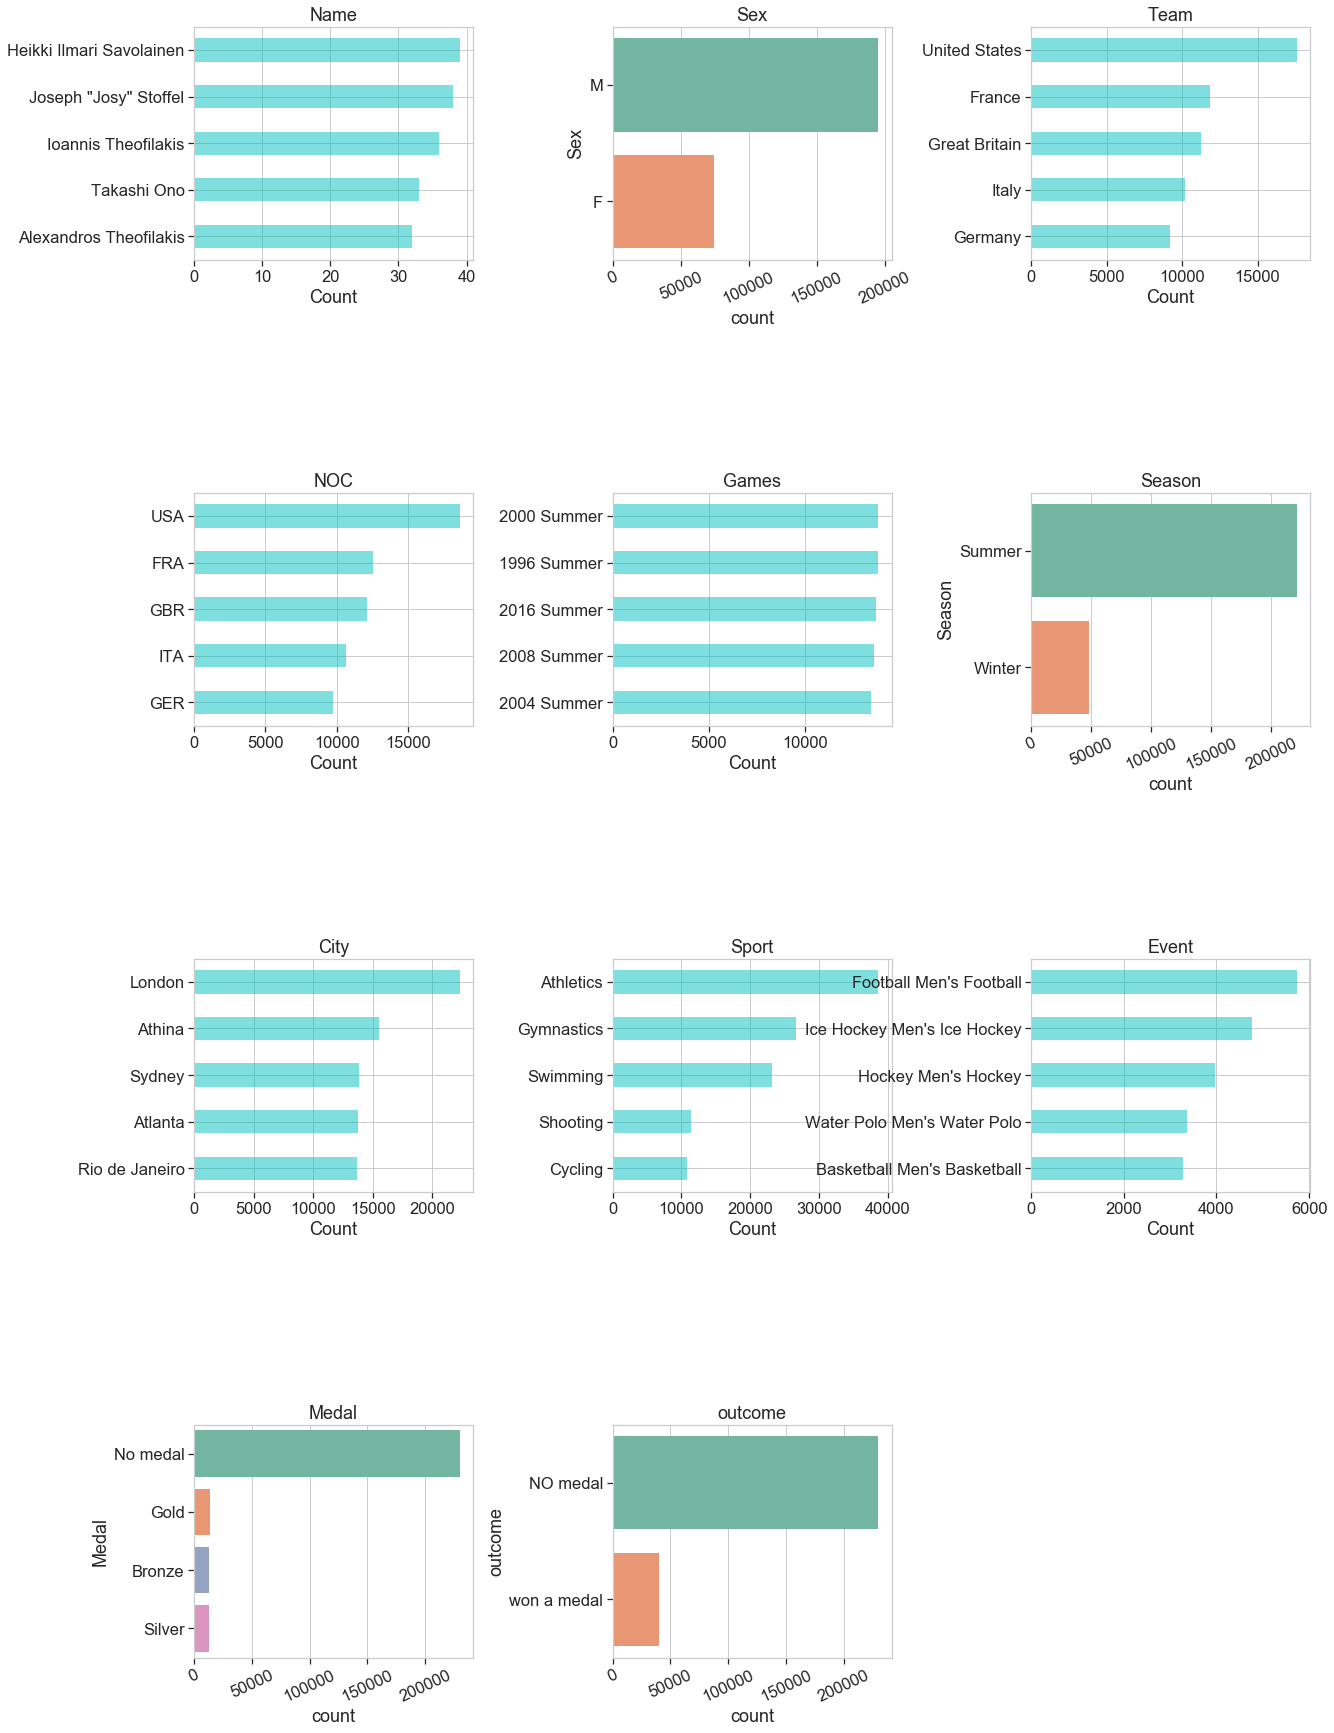

In [21]:
# distribution of each categorical feature
plot_distribution(df_data, columns_categorical, cols=3, width=20, height=30, hspace=1, wspace=0.5)

In [22]:
df_data['outcome'].value_counts()

NO medal       229959
won a medal     39772
Name: outcome, dtype: int64

In [23]:
print("% of observations with values in the column Medal:")
39783 / 231333 * 100

% of observations with values in the column Medal:


17.197287027791106

### Spot checks

In [24]:
df_check = df_data.groupby(['Name'])[['Year', 'Sport', 'Season', 'Event']].nunique()
df_check.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

,Year,Sport,Season,Event
count,134732.000000,134732.000000,134732.000000,134732.000000
mean,1.389700,1.013775,1.002323,1.539605
std,0.735731,0.130896,0.048143,1.178301
min,1.000000,1.000000,1.000000,1.000000
10%,1.000000,1.000000,1.000000,1.000000
20%,1.000000,1.000000,1.000000,1.000000
30%,1.000000,1.000000,1.000000,1.000000
40%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
60%,1.000000,1.000000,1.000000,1.000000


In [25]:
# athletes who participate in 33 events
df_check[df_check["Event"] == 33]

,Year,Sport,Season,Event
Name,,,,
Ioannis Theofilakis,6,1,1,33


In [26]:
df_data[df_data['Name'] == 'Ioannis Theofilakis']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,outcome
238513,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",No medal,NO medal
238514,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",No medal,NO medal
238515,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Any Position, 300 m...",No medal,NO medal
238516,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 1873-1874 Gras ...",No medal,NO medal
238517,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Shooting,"Shooting Men's Military Rifle, Kneeling Or Sta...",No medal,NO medal
238518,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Free Pistol, 50 yards",No medal,NO medal
238519,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Free Pistol, 50 yards, Team",No medal,NO medal
238520,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",No medal,NO medal
238521,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1908 Summer,1908,Summer,London,Shooting,"Shooting Men's Military Rifle, 200/500/600/800...",No medal,NO medal
238522,Ioannis Theofilakis,M,NaN,NaN,NaN,Greece,GRE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Free Pistol, 50 metres",No medal,NO medal


***

In [27]:
# athletes who participate in more than 1 sport:
df_check[df_check["Sport"] > 2]['Sport'].value_counts()

3    131
4     28
5      4
Name: Sport, dtype: int64

In [28]:
df_check[df_check["Sport"] == 5]

,Year,Sport,Season,Event
Name,,,,
Kim Seong-Eun,5,5,1,5
Wang Nan,5,5,2,8
Wolfgang Mller,4,5,2,9
Zhang Li,5,5,2,6


In [29]:
df_data[df_data['Name'] == 'Wolfgang Mller']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,outcome
165566,Wolfgang Mller,M,24.0,177.0,95.0,Germany,GER,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Middle-Heavyweight,No medal,NO medal
165567,Wolfgang Mller,M,30.0,181.0,78.0,West Germany,FRG,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,No medal,NO medal
165568,Wolfgang Mller,M,25.0,180.0,69.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 400 metres,No medal,NO medal
165569,Wolfgang Mller,M,25.0,180.0,69.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 400 metres Relay,No medal,NO medal
165570,Wolfgang Mller,M,37.0,174.0,68.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Dressage, Individual",No medal,NO medal
165571,Wolfgang Mller,M,37.0,174.0,68.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Dressage, Team",No medal,NO medal
165572,Wolfgang Mller,M,40.0,174.0,68.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Dressage, Individual",No medal,NO medal
165573,Wolfgang Mller,M,40.0,174.0,68.0,East Germany,GDR,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Dressage, Team",No medal,NO medal
165574,Wolfgang Mller,M,24.0,187.0,78.0,West Germany,FRG,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,No medal,NO medal
165575,Wolfgang Mller,M,24.0,187.0,78.0,West Germany,FRG,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,No medal,NO medal


In [30]:
# athletes who likely have same names
repeated_names = list(df_check[df_check["Sport"] == 5].index)
repeated_names

['Kim Seong-Eun', 'Wang Nan', 'Wolfgang Mller', 'Zhang Li']

In [31]:
# teams with athletes who have same names
df_data[df_data['Name'].isin(repeated_names)]['Team'].value_counts()

China           17
South Korea      6
East Germany     6
West Germany     4
China-1          2
Germany          1
Name: Team, dtype: int64

In [32]:
# athletes who participate in Olympics more than 2 years:
df_check[df_check["Year"] > 2]['Year'].value_counts()

3     8132
4     2218
5      581
6      141
7       32
8        9
9        2
10       1
Name: Year, dtype: int64

In [33]:
df_check[df_check['Year'] == 10]

,Year,Sport,Season,Event
Name,,,,
Ian Millar,10,1,1,2


In [34]:
df_data[df_data['Name'] == 'Ian Millar']['Year'].value_counts()

2012    2
2008    2
2000    2
1996    2
1992    2
1988    2
1984    2
1976    1
1972    1
2004    1
Name: Year, dtype: int64

In [35]:
df_data[df_data['Name'] == 'Ian Millar']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,outcome
159081,Ian Millar,M,25.0,185.0,76.0,Canada,CAN,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal,NO medal
159082,Ian Millar,M,29.0,185.0,76.0,Canada,CAN,1976 Summer,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal,NO medal
159083,Ian Millar,M,37.0,185.0,76.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Equestrianism,"Equestrianism Mixed Jumping, Individual",No medal,NO medal
159084,Ian Millar,M,37.0,185.0,76.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal,NO medal
159085,Ian Millar,M,41.0,185.0,76.0,Canada,CAN,1988 Summer,1988,Summer,Seoul,Equestrianism,"Equestrianism Mixed Jumping, Individual",No medal,NO medal
159086,Ian Millar,M,41.0,185.0,76.0,Canada,CAN,1988 Summer,1988,Summer,Seoul,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal,NO medal
159087,Ian Millar,M,45.0,185.0,76.0,Canada,CAN,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Individual",No medal,NO medal
159088,Ian Millar,M,45.0,185.0,76.0,Canada,CAN,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal,NO medal
159089,Ian Millar,M,49.0,185.0,76.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Equestrianism,"Equestrianism Mixed Jumping, Individual",No medal,NO medal
159090,Ian Millar,M,49.0,185.0,76.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Equestrianism,"Equestrianism Mixed Jumping, Team",No medal,NO medal


***

In [36]:
# create new athlete ID as unique combination of Name-Sex-Sport
df_data['NEW_ID'] = df_data['Name'] + '|' + df_data['Sex'] + '|' + df_data['Sport']
df_data[['Name', 'NEW_ID']].describe()

,Name,NEW_ID
count,269731,269731
unique,134732,136589
top,Heikki Ilmari Savolainen,Heikki Ilmari Savolainen|M|Gymnastics
freq,39,39


In [37]:
print('Estimated percent of athletes who share name:', int((136589 - 134732)/136589*100), '%')

Estimated percent of athletes who share name: 1 %


##### Observations:

- data covers competitions held in the period from 1896 to 2016 (35 unique values)
- more than 50% of athletes were in their 20s, weight 60 - 80 kilograms and are 1.65 - 1.85 meters tall
- period between each Olympic Game is 2 or 4 years, but there are cases with longer interval (max=12)
- there are athletes who competed in several categories (Ex. as a team member and individual)
- approximately 1% of athletes share name
- appeoximatelly 17% of athletes in the dataset won a medal, assuming that missing values in the column Medal means "An athlete did not win",

# Data Exploration - Bi-variate

/Users/tatiana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/tatiana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/tatiana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


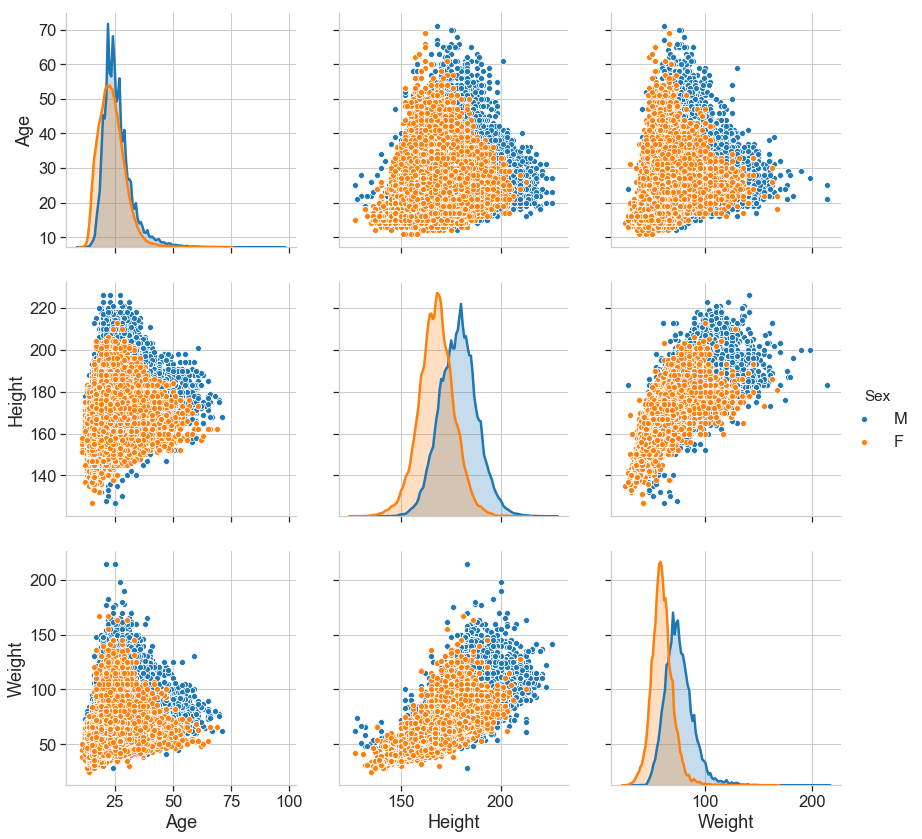

In [38]:
# interaction between pairs of features.
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(df_data[['Age', 'Height', 'Weight', 'Sex']], 
             hue='Sex',
             diag_kind="kde",
             size=4);

/Users/tatiana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


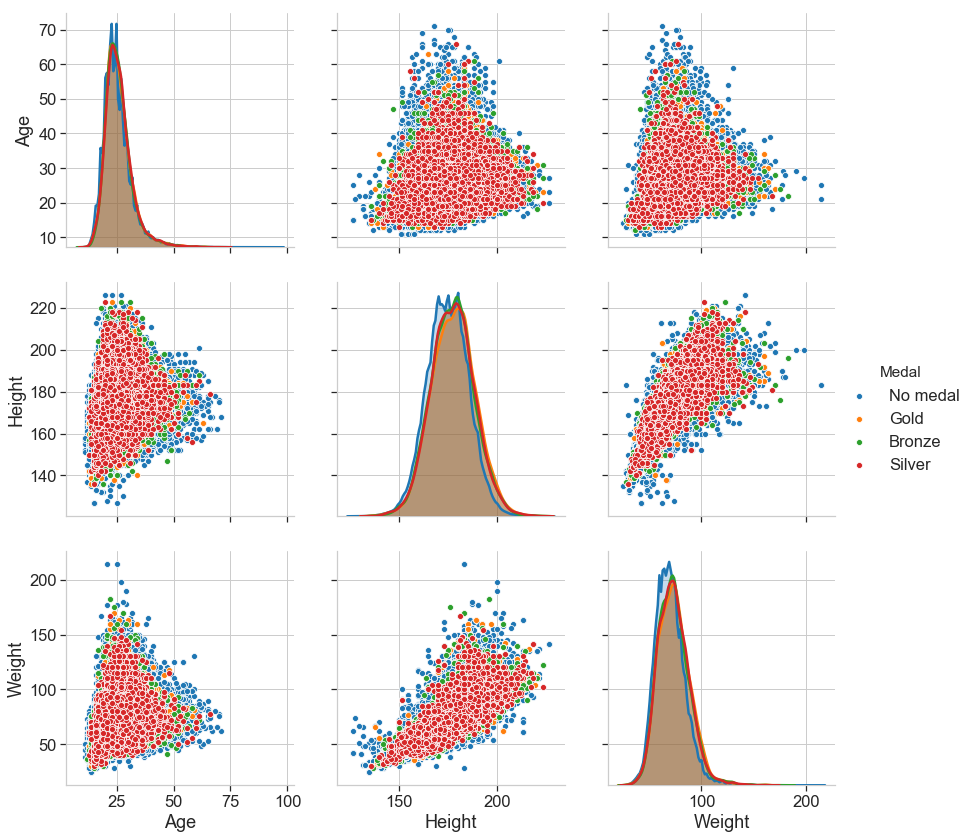

In [39]:
# interaction between pairs of features.
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(df_data[['Age', 'Height', 'Weight', 'Medal']], 
             hue='Medal',
             diag_kind="kde",
             size=4);

/Users/tatiana/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


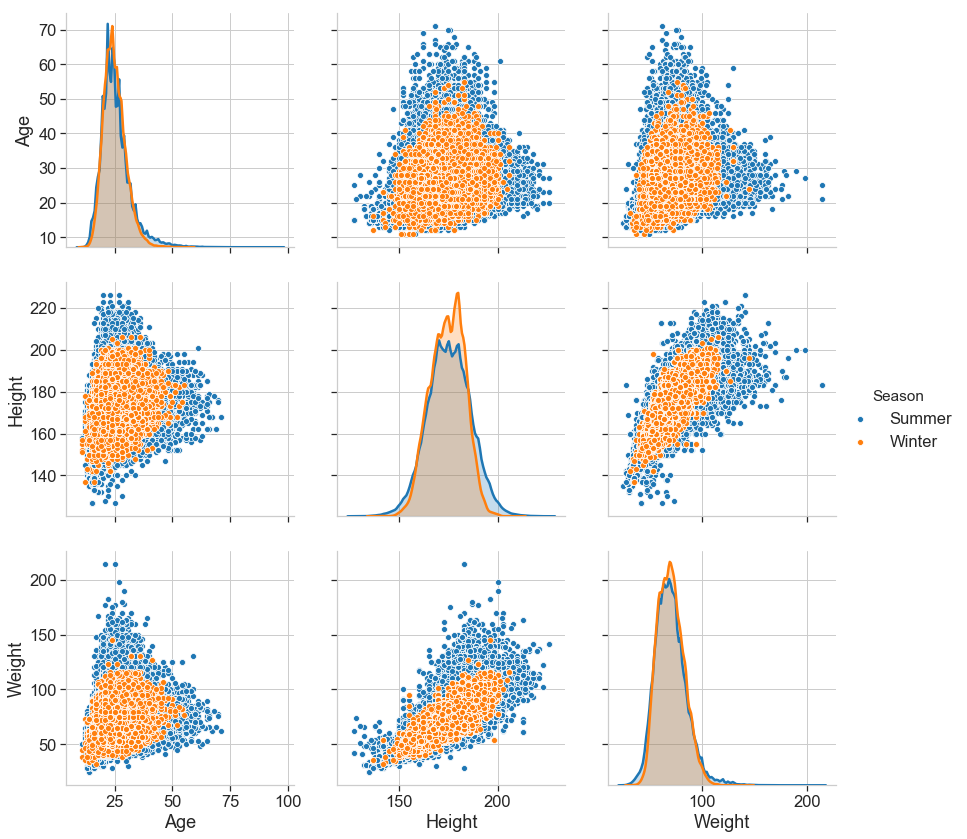

In [40]:
# interaction between pairs of features.
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(df_data[['Age', 'Height', 'Weight', 'Season']], 
             hue='Season',
             diag_kind="kde",
             size=4);

In [41]:
df_data.groupby('Season')[['Age', 'Height', 'Weight']].describe().T

Season               Summer        Winter
Age    count  212137.000000  48279.000000
       mean       25.549367     25.039147
       std         6.434035      4.777735
       min        10.000000     11.000000
       25%        21.000000     22.000000
       50%        24.000000     24.000000
       75%        28.000000     28.000000
       max        97.000000     58.000000
Height count  170667.000000  40250.000000
       mean      175.515560    174.590112
       std        10.914843      8.598176
       min       127.000000    137.000000
       25%       168.000000    168.000000
       50%       175.000000    175.000000
       75%       183.000000    181.000000
       max       226.000000    211.000000
Weight count  168661.000000  39543.000000
       mean       70.688298     70.759275
       std        14.805242     12.213273
       min        25.000000     32.000000
       25%        60.000000     62.000000
       50%        70.000000     70.000000
       75%        79.000000     79.000000
       max       214.000000    145.000000

No handles with labels found to put in legend.


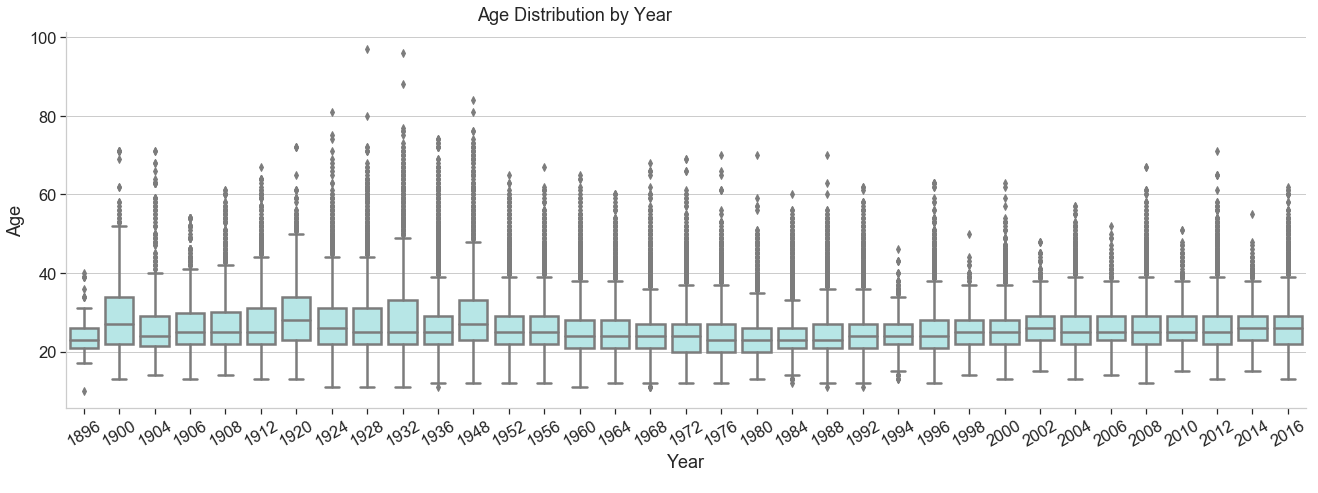

In [42]:
# Age Distribution by Year
g = sns.catplot(x="Year", y="Age", 
            color='paleturquoise', legend_out=False,
            kind="box", data=df_data);

g.fig.set_figheight(7)
g.fig.set_figwidth(25)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Age Distribution by Year", fontsize=18)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

### Interesting findings

In [43]:
# the most popular sports for athletes older than 40
age_ge40 = df_data[df_data['Age'] > 40]
ts = age_ge40['Sport'].value_counts()

top_5_age_ge40 = age_ge40[age_ge40['Sport'].isin(list(ts.index)[:5])]
top_5_age_ge40.groupby(['Sport'])['Age'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Sport,,,,,,,,
Shooting,2140.0,46.252804,5.031747,41.0,42.0,45.0,49.0,72.0
Equestrianism,1384.0,46.492052,5.102982,41.0,43.0,45.0,49.0,72.0
Art Competitions,1155.0,52.296970,8.937737,41.0,45.0,50.0,58.0,97.0
Sailing,677.0,46.847858,5.671914,41.0,43.0,45.0,50.0,71.0
Fencing,576.0,44.402778,3.599168,41.0,42.0,43.0,46.0,63.0


Text(0.5, 0.98, 'Age Distribution of Athletes with Medals')

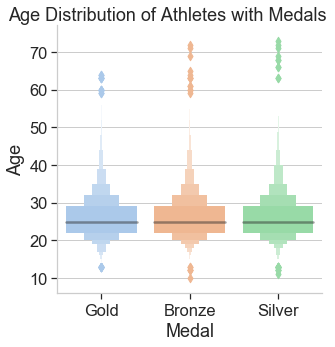

In [44]:
# Age of Athletes with Medals
df_medals = df_data[df_data['Medal'] != 'No medal']

g = sns.catplot(x="Medal", y="Age",
            palette='pastel', legend_out=False, k_depth="proportion",
            kind="boxen", data=df_medals);

g.fig.set_figheight(5)
g.fig.set_figwidth(5)

g.fig.suptitle("Age Distribution of Athletes with Medals", fontsize=18)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


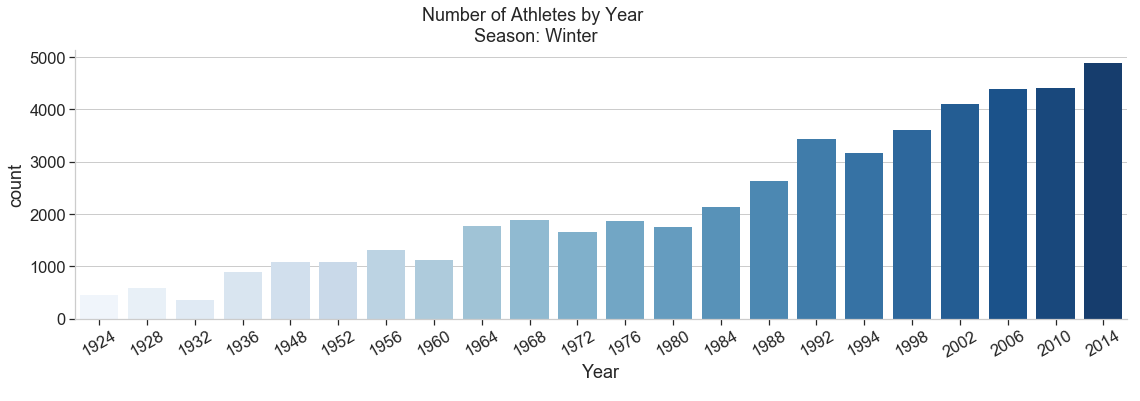

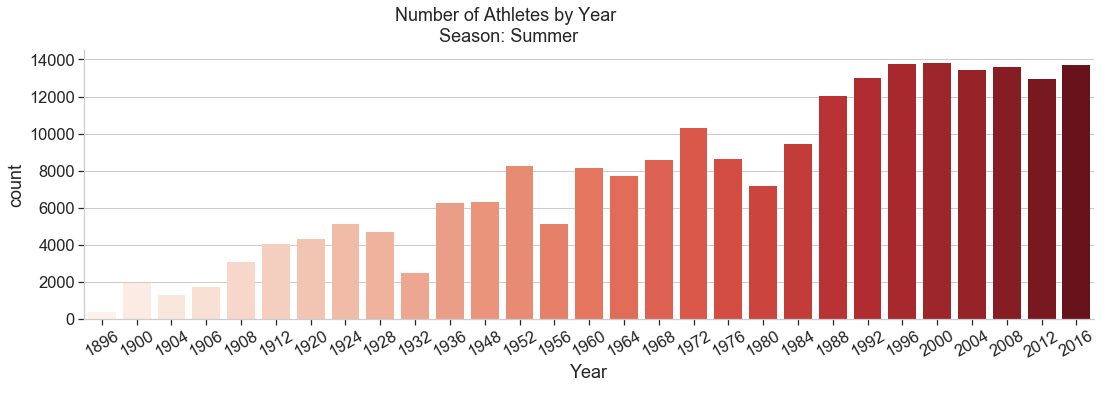

In [45]:
# number of athletes by year

plt.style.use('seaborn-whitegrid')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

season = 'Winter'
df_tmp = df_data[df_data['Season'] == season]
g = sns.catplot(x="Year",
            palette='Blues', legend_out=False,
            kind="count", data=df_tmp);

g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Number of Athletes by Year\n Season: " + season, fontsize=18, y=1.05)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)



season = 'Summer'
df_tmp = df_data[df_data['Season'] == season]
g = sns.catplot(x="Year", 
            palette='Reds', legend_out=False,
            kind="count", data=df_tmp);

g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(rotation=30)

g.fig.suptitle("Number of Athletes by Year\n Season: " + season, fontsize=18, y=1.05)
g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

In [46]:
df_y_sp = pd.DataFrame(df_data.groupby(['Season', 'Year'])['Sport'].apply(lambda x: "|".join(x))).reset_index()
df_y_sp['Sport'] = df_y_sp['Sport'].str.split("|").apply(set).apply(len)


df_y_sp[df_y_sp['Year'] >= 2000]

,Season,Year,Sport
24,Summer,2000,34
25,Summer,2004,34
26,Summer,2008,34
27,Summer,2012,32
28,Summer,2016,34
47,Winter,2002,15
48,Winter,2006,15
49,Winter,2010,15
50,Winter,2014,15


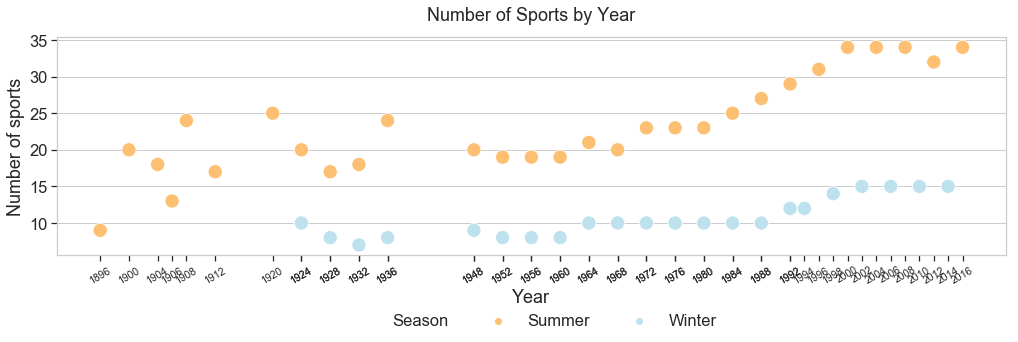

In [47]:
df_sports = pd.DataFrame(df_data.groupby(['Season', 'Year'])['Sport'].apply(lambda x: "|".join(x))).reset_index()
df_sports['Number of sports'] = df_sports['Sport'].str.split("|").apply(set).apply(len)

plt.style.use('seaborn-whitegrid')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

g = sns.scatterplot(x="Year", y="Number of sports", hue='Season',
               #size="Number of sports", sizes=(15, 1000), 
               palette='RdYlBu', s=200,
               data=df_sports)

plt.title("Number of Sports by Year", fontsize=18, y=1.05)
g.figure.set_figwidth(17)
g.set_xticks(list(df_sports['Year'].values))
g.set_xticklabels(list(df_sports['Year'].values), rotation=30, fontsize="xx-small")
g.grid(axis='x')
g.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

##### Observations:

- in general, athletes have higher weight when they are taller
- there are no notable differences in athletes' complexion between different season games
- athletes older 30 are more likely to have weight between 60 and 100 kilograms and height between 1.6 and 2 meters
- while at least 50% of athletes all times are in their 20s, there were considerable number of athletes older than 40 during 1924-1948
- the most popular sports for athletes older than 40 are Shooting, Equestrianism and Art Competitions, 
  with average age above 45 and maximum age above 70
- majority of medalist are in their 20s  
- number of athletes stays more or less the same (around 13,000) for the last 20 years in Summer Olympics and still growing for Winter Olympics 